# <center><b><u>Bollywood</u></b></center>
![Bollywood](https://miro.medium.com/max/700/1*OjBI53d4Rm4rg4gWze77Mw.jpeg)

# <B><u>Dataset Description:</u></B>
The data file 'bollywood.csv' contains box office collection and social media promotion information about movies released in 2013 - 2015 period.

# <B><u>TOC:</u></B>
1. [Importing Data](#first)
2. [How many records are present in the dataset? Print the metadata information of the dataset?](#second)
3. [How many movies got released in each genre? which genre had highest number of releases? Sort number of releases in each genre in descending order](#third)
4. [How many movies in each genre got released in different release times like long weekend, festive season, etc](#fourth)
5. [Which month of the year, maximum number movie releases are seen?](#fifth)
6. [Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?](#sixth)
7. [Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection - Budget) / Budget?](#seventh)
8. [Do the movies have higher ROI if they get released on festive seasons or long weekends? Calculate the average ROI for different  release times.](#eighth)
9. [Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.](#ninth)
10. [Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?](#tenth)
11. [Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?](#eleventh)
12. [Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.](#twelfth)
13. [Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?](#thirteenth)

# 1. Importing Data<a class="anchor" id="first"></a>

In [1]:
# Importing all dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bollywood = pd.read_csv('bollywood.csv')
bollywood.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


# 2. How many records are present in the dataset? Print the metadata information of the dataset?<a class="anchor" id="second"></a>

Metadata information of dataset is given below:

In [3]:
bollywood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


There are 149 records and 10 columns in the dataset.

In [4]:
print("Number of Unique Values in Each Column:\n")
i = 1
for col in bollywood.columns:
    print(str(i) + ") " + col + ": " + str(bollywood[col].nunique()))
    i += 1

Number of Unique Values in Each Column:

1) SlNo: 149
2) Release Date: 102
3) MovieName: 149
4) ReleaseTime: 4
5) Genre: 7
6) Budget: 49
7) BoxOfficeCollection: 118
8) YoutubeViews: 149
9) YoutubeLikes: 146
10) YoutubeDislikes: 145


# 3. How many movies got released in each genre? which genre had highest number of releases? Sort number of releases in each genre in descending order.<a class="anchor" id="third"></a>

In [5]:
bollywood.Genre.value_counts().sort_values(ascending=False)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

The above table shows the number of movies released in each genre. Comedy had highest number of movie releases.

# 4. How many movies in each genre got released in different release times like long weekend, festive season, etc<a class="anchor" id="fourth"></a>

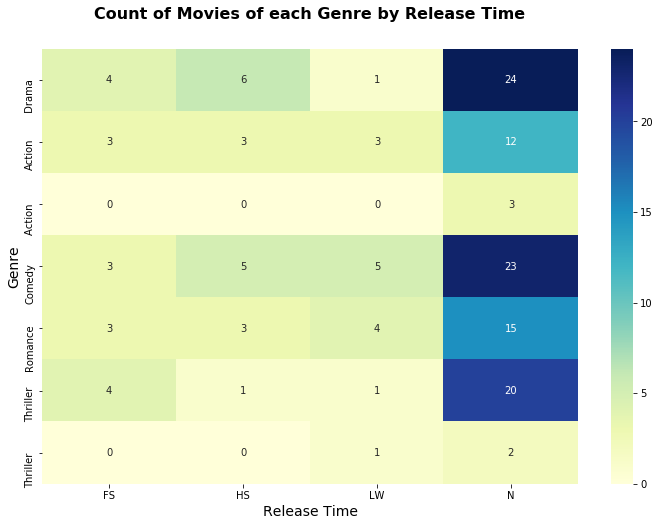

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(bollywood['Genre'], bollywood['ReleaseTime']), annot=True, cmap="YlGnBu")
plt.title("Count of Movies of each Genre by Release Time", fontsize=16, fontweight='bold', pad=30)
plt.xlabel("Release Time", fontsize=14)
plt.ylabel("Genre", fontsize=14)
plt.show()

The above heatmap shows the counts of movie releases in each genre by release time. Normal release time has highest movie releases and that too especially in Drama, Comedy and Thriller genres.

# 5. Which month of the year, maximum number movie releases are seen?<a class="anchor" id="fifth"></a>

In [7]:
bollywood['Release Date'] = pd.to_datetime(bollywood['Release Date'])
bollywood['Month'] = bollywood['Release Date'].apply(lambda x: x.strftime("%B"))
print("**Number of Movie Releases in each Month:**\n")
print(bollywood.Month.value_counts().sort_values(ascending=False))

**Number of Movie Releases in each Month:**

January      20
March        19
May          18
July         16
February     16
April        11
November     10
September    10
June         10
October       9
August        8
December      2
Name: Month, dtype: int64


As can be shown from the above output, maximum number of movies are released in January.

# 6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?<a class="anchor" id="sixth"></a>

In [8]:
bollywood[bollywood['Budget'] >= 25].Month.value_counts().sort_values(ascending=False)

February     9
January      8
August       7
March        7
July         6
November     6
September    5
June         5
April        4
October      4
May          3
December     2
Name: Month, dtype: int64

As we can see in above output, Month of February saw the maximum number of high budgeted movie releases.

# 7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection - Budget) / Budget?<a class="anchor" id="seventh"></a>

Top 10 movies with maximum ROI are given below:

In [9]:
bollywood['ROI'] = (bollywood['BoxOfficeCollection'] - bollywood['Budget']).div(bollywood['Budget'], axis = 'rows')
bollywood.groupby('MovieName')['ROI'].max().head(10).sort_values(ascending=False)

MovieName
Aashiqui 2                   8.166667
ABCD _ Any Body Can Dance    2.666667
B.A. Pass                    1.950000
2 States                     1.888889
Alone                        0.388889
3G                           0.164000
Aurangzeb                    0.150000
Aatma                        0.097500
Action Jackson              -0.361667
Amit Sahni Ki List          -0.600000
Name: ROI, dtype: float64

# 8. Do the movies have higher ROI if they get released on festive seasons or long weekends? Calculate the average ROI for different  release times.<a class="anchor" id="eighth"></a>

The above output shows top 10 movies with highest ROI. <b>Aashiqui 2</b> had the highest ROI even among the top 10.

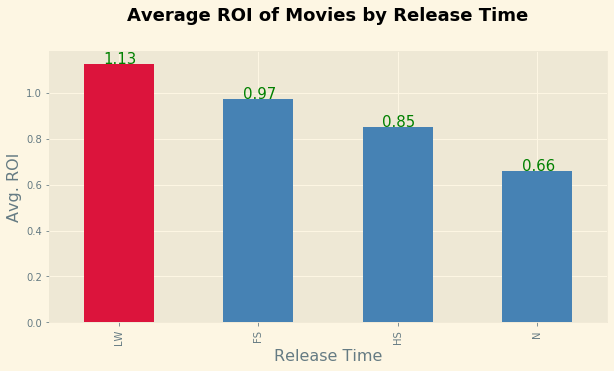

In [10]:
plt.style.use('Solarize_Light2')
ax = bollywood.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False).plot.bar(color=['crimson', 'steelblue','steelblue', 'steelblue'], figsize=(10, 5))
ax.set_title("Average ROI of Movies by Release Time", fontsize=18, fontweight='bold', pad=30)
ax.set_xlabel("Release Time", fontsize=16)
ax.set_ylabel("Avg. ROI", fontsize=16)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.14, i.get_height()+.0025, \
        str(round(i.get_height(), 2)), fontsize=15,
            color='green')
plt.show()

Movies released on Long Weekends (LW) gave 113% ROI over budget as compared to movies released on Festival Season which gave 97% ROI over budget.

# 9. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.<a class="anchor" id="ninth"></a>

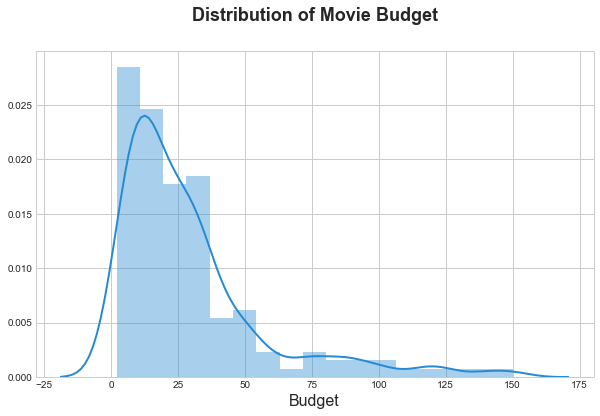

In [11]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 6))
sns.distplot(bollywood['Budget'])
plt.title("Distribution of Movie Budget", fontsize=18, fontweight='bold', pad=30)
plt.xlabel("Budget", fontsize=16)
plt.show()

As the distribution of the movie budget is rightly skewed, we can infer that most of the movies are low budgetted.

# 10. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?<a class="anchor" id="tenth"></a>

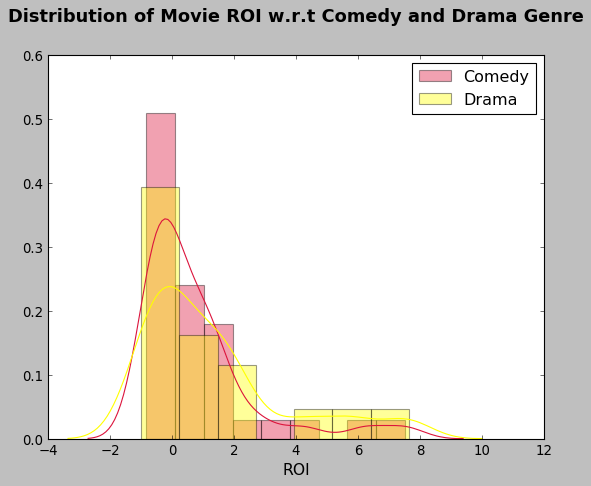

In [12]:
plt.style.use('_classic_test')
sns.distplot(bollywood[bollywood.Genre == 'Comedy']['ROI'], color = 'crimson',label='Comedy')
sns.distplot(bollywood[bollywood.Genre == ' Drama ']['ROI'], color='yellow', label='Drama')
plt.title("Distribution of Movie ROI w.r.t Comedy and Drama Genre", fontsize=16, fontweight='bold', pad=30)
plt.xlabel("ROI", fontsize=14)
plt.legend()
plt.show()

Both the distributions corresponding to Comedy and Drama genres are right skewed i.e. most of the movies in both the genres give low ROI. But since there are more movies in Comedy genre that give lower ROI than in Drama genre, we can infer that Drama genre has more movies that give higher ROI. Also, the right tail of ROI corresponding to Drama genre is higher which also supports our inference.

# 11. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?<a class="anchor" id="eleventh"></a>

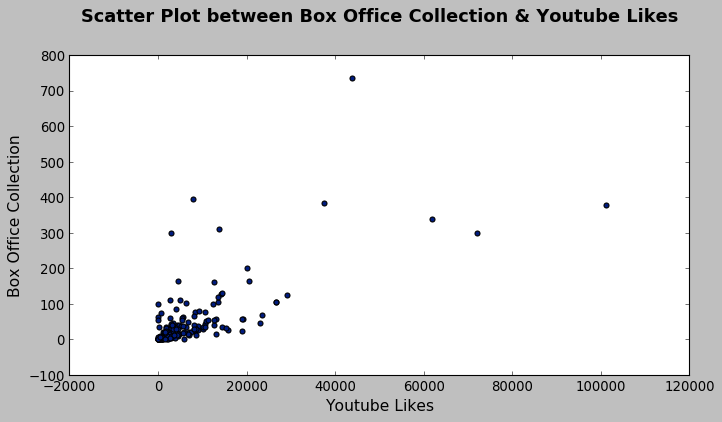

		  Correlation between Box Office Collection and Youtube Likes: 0.68


In [13]:
plt.style.use('seaborn-dark-palette')
bollywood[['BoxOfficeCollection', 'YoutubeLikes']].plot.scatter(x='YoutubeLikes', y='BoxOfficeCollection', figsize=(10, 5))
plt.title("Scatter Plot between Box Office Collection & Youtube Likes", fontsize=16, fontweight='bold', pad=30)
plt.xlabel("Youtube Likes", fontsize=14)
plt.ylabel("Box Office Collection", fontsize=14)
plt.show()
print('\t\t  Correlation between Box Office Collection and Youtube Likes:', round(bollywood[['BoxOfficeCollection', 'YoutubeLikes']].corr().iloc[0, 1], 2))

We can see that as Youtube Likes increase, box office collection too increases i.e. there is somewhat a linear trend between them. However, Most of the movie data points are concentrated where both box office collections and Youtube likes are low i.e. most of the movies in the dataset are those that have low box office collection as well as low Youtube likes. <b><u>The correlation between them is 0.68 and it is positive</u></b>.

# 12. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.<a class="anchor" id="twelfth"></a>

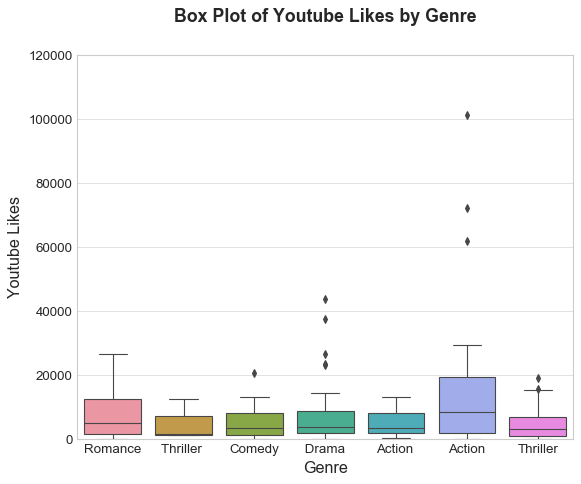

In [14]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='YoutubeLikes', data=bollywood)
plt.title("Box Plot of Youtube Likes by Genre", fontsize=16, fontweight='bold', pad=30)
plt.xlabel("Genre", fontsize=14.5)
plt.ylabel("Youtube Likes", fontsize=14.5)
plt.show()

From the above boxplot of YouTube Likes by Genre, we can infer that <b>movies of Action Genre see more YouTube likes when compared to others</b>. Also, there are many outliers corresponding to Comedy, Drama, Action and Thriller.

# 13. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?<a class="anchor" id="thirteenth"></a>

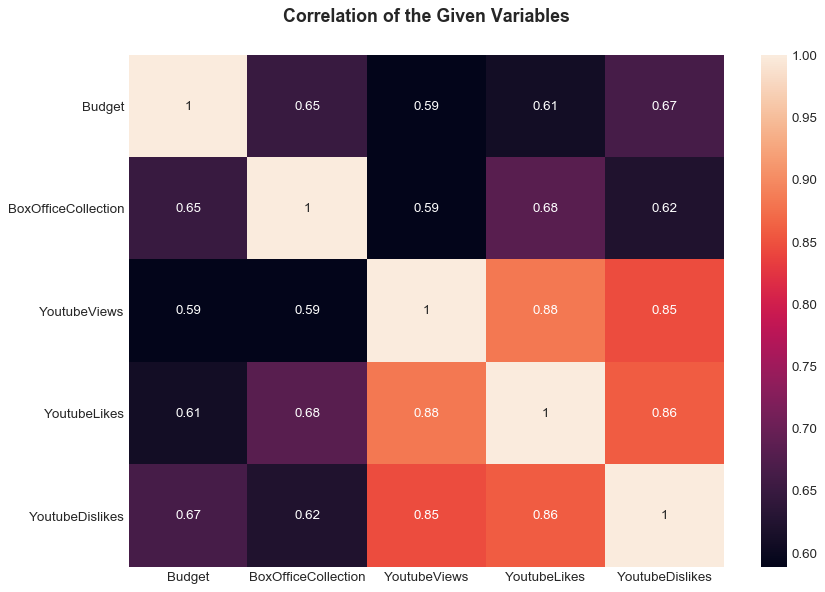

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(bollywood[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr(), annot=True)
plt.title("Correlation of the Given Variables", fontsize=16, fontweight='bold', pad=30)
plt.show()

<b>YoutubeViews</b> and <b>YoutubeLikes</b> have the highest correlation i.e <b>0.88</b> which is positive. We can even verify this through the following scatterplot:

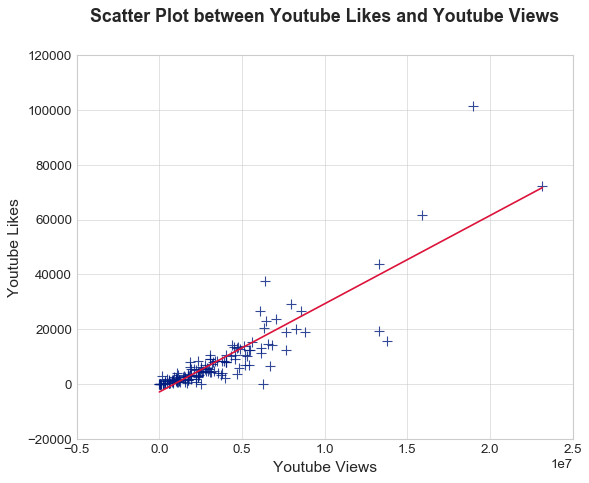

In [16]:
sns.regplot(x='YoutubeViews', y="YoutubeLikes", data=bollywood, ci=None,
           marker='+', scatter_kws={"s": 80}, line_kws={"color":"crimson"})
plt.title("Scatter Plot between Youtube Likes and Youtube Views", fontsize=16, fontweight='bold', pad=30)
plt.xlabel("Youtube Views", fontsize=14)
plt.ylabel("Youtube Likes", fontsize=14)
plt.show()

The above scatter plot does show a strong linear trend between Youtube Views and Youtube Likes.